# 08wk-2: 마코프체인 (5)

최규빈  
2023-04-25

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-zHbA2xrF58wfGjzkhNzxnL>

# import

In [1]:
import numpy as np

# review

`-` 지난시간 복습

|                 | 특징1(수렴) | 특징2(동일row) | 특징3(정상분포) | 특징4(정상과정) |
|:---------------:|:-----------:|:--------------:|:---------------:|:---------------:|
|  예시1(나이스)  |      O      |       O        |  존재O, 유일O   |        O        |
|  예시2(나이스)  |      O      |       O        |  존재O, 유일O   |        O        |
|   예시3(흡수)   |      O      |       O        |  존재O, 유일O   |        O        |
| 예시4(단위행렬) |      O      |       X        |  존재O, 유일X   |        O        |
|   예시5(주기)   |      X      |       NA       |  존재O, 유일O   |        O        |

`-` 목표: 예시4와 예시5를 좀 더 공부해보자.

# irreducible

## Motivating Examples

### 예제1

`-` 아래의 전이확률을 고려하자.

In [2]:
P =np.array([0.5, 0.5, 0.0, 0.0, 
             0.5, 0.5, 0.0, 0.0,
             0.0, 0.0, 0.5, 0.5,
             0.0, 0.0, 0.5, 0.5]).reshape(4,4)
P

`-` 특징1: ${\bf P}$는 수렴함

In [5]:
P@P@P

`-` 특징2: 모든 row가 같은건 아님

`-` 특징3: 정상분포는 유일하게 존재하지 않음

In [8]:
π = np.array([1/4, 1/4, 1/4, 1/4]).reshape(4,1)
π

In [10]:
π.T @ P, π.T 

In [11]:
π = np.array([1/2, 1/2, 0, 0]).reshape(4,1)
π

In [13]:
π.T @ P, π.T 

In [14]:
π = np.array([1/6, 1/6, 2/6, 2/6]).reshape(4,1)
π

In [15]:
π.T @ P, π.T 

`-` 특징4: 초기분포가 정상분포라면 정상확률과정

`-` 특징5: 상태공간 $E$ 에 equivalence class 가 2개 있는 느낌

### 예제2

`-` 아래의 전이확률을 고려하자.

In [18]:
P =np.array([1/4, 1/4, 0.0, 1/2, 
             1/4, 1/4, 0.0, 1/2,
             0.0, 0.0, 1.0, 0.0,
             1/2, 1/4, 0.0, 1/4]).reshape(4,4)
P

`-` 특징1: ${\bf P}$는 수렴함

In [23]:
np.matrix(P)**500

`-` 특징2: 모든 row가 같지는 않음

`-` 특징3: 유일한 정상분포를 가지는건 아님

In [31]:
c1 = 0.2 # 상태 0,1,3 
c2 = 0.8 # 상태 2 
π = np.array([0.35*c1, 0.25*c1, 1.0*c2 ,0.4*c1]).reshape(4,1)
π

In [32]:
π.T @ P, π.T 

`-` 특징4: 초기분포가 정상분포라면 정상확률과정

`-` 특징5: 상태공간 $E$에 equivalence class 가 2개 있는 느낌

## 정의 및 이론

`-` **용어**

-   irreducible (기약) // reducible (비기약)
-   (strongly) connected

`-` **정의**

`-` **느낌**

-   연결되어있는 느낌. 즉 모든 $x,y \in E$에 대하여 $x\to \cdots \to y$
    인 path 나 $y \to \cdots \to x$ 인 path 가 존재함
-   겉도는 그룹이 없음 (상태공간 $E$에 단 하나의 equivalence class가
    존재함)

`-` **Thm**: HMC $\{X_t\}$ 가 (1) finite state space 를 가지고 (2)
irreducible 이라면 $\{X_t\}$의 유일한 정상분포 ${\boldsymbol \pi}$가
존재하며 모든 state에 대한 확률은 양수이다.

# aperiodic

## Motivating Examples

### 예제1

`-` 아래와 같은 전이확률을 고려하자.

In [33]:
P = np.array([0.0, 1.0, 0.0,
              0.0, 0.0, 1.0,
              1.0, 0.0, 0.0]).reshape(3,3)
P

`-` 다이어그램

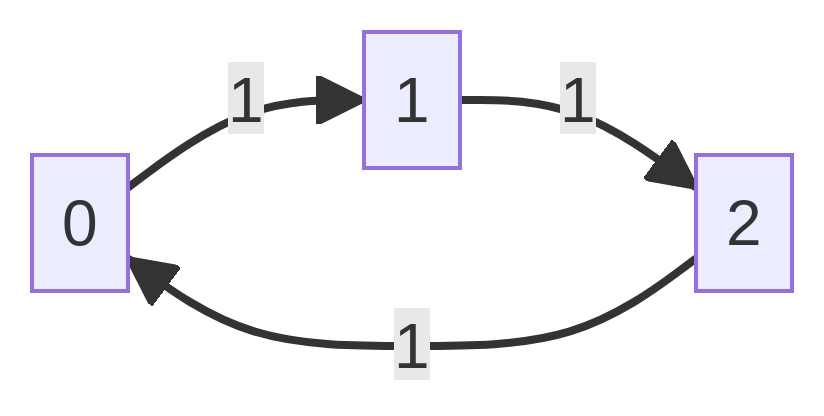

`-` 특징1: ${\bf P}$는 수렴안함

In [40]:
P@P@P

`-` 특징2:

`-` 특징3: 정상분포는 유일하게 존재함.

In [41]:
π = np.array([1/3,1/3,1/3]).reshape(3,1)
π

In [42]:
π.T @ P, π.T

`-` 특징4: 초기분포가 정상분포라면 정상확률과정

`-` 특징5: 상태공간 $E$에 equivalence class 가 1개

`-` 특징6: 주기성을 가짐 (주기는 3)

-   관찰: 어떠한 상태 $x \in E$ 에 있더라도 반드시 3번 안에는 원래
    상태로 되돌아옴.

### 예제2

`-` 아래와 같은 전이확률을 고려하자.

In [44]:
P = np.array([0.0, 1.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0,
              0.0, 1.0, 0.0, 0.0,
              1/3, 0.0, 2/3, 0.0]).reshape(4,4)
P

`-` 다이어그램

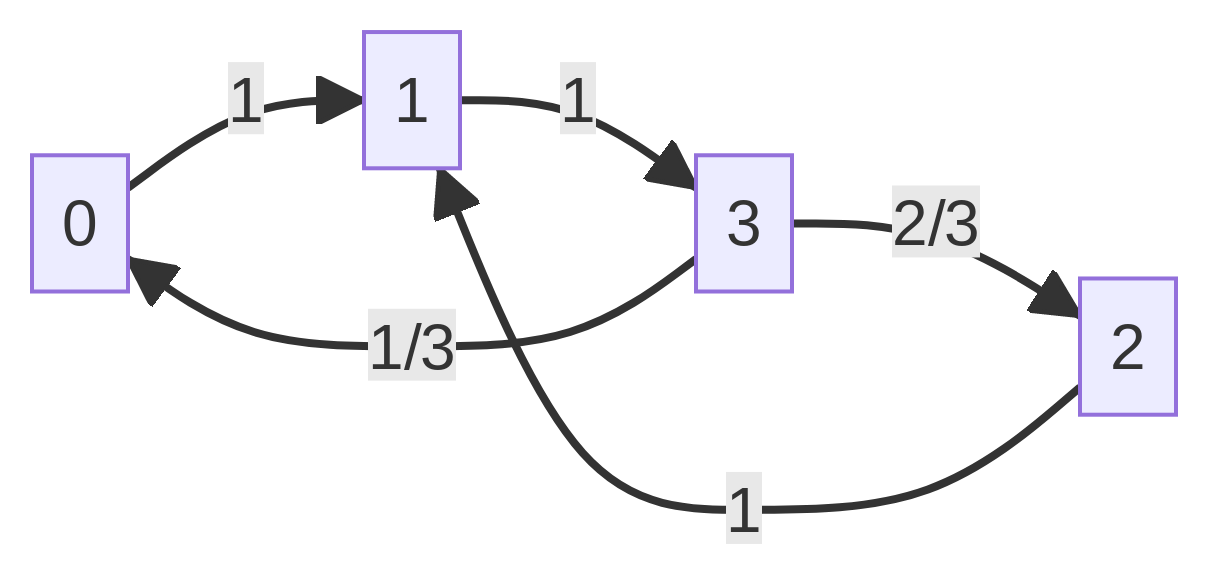

`-` 특징1: ${\bf P}$는 수렴안함

In [52]:
P@P@P@P

`-` 특징2: Pass

`-` 특징3: 정상분포는 유일하게 존재함.

In [54]:
π = (np.array([1,3,2,3])/9).reshape(4,1)
π

In [56]:
π.T @ P, π.T 

**어떻게 찾음?**

In [60]:
eig_value, eig_vector_matrix = np.linalg.eig(P.T)

In [64]:
eig_value[2]

In [69]:
π = abs(eig_vector_matrix[:,2])
π = π/π.sum()
π

`-` 특징4: 초기분포가 정상분포라면 정상확률과정

`-` 특징5: irr

`-` 특징6: 주기성을 가짐 (주기는3)

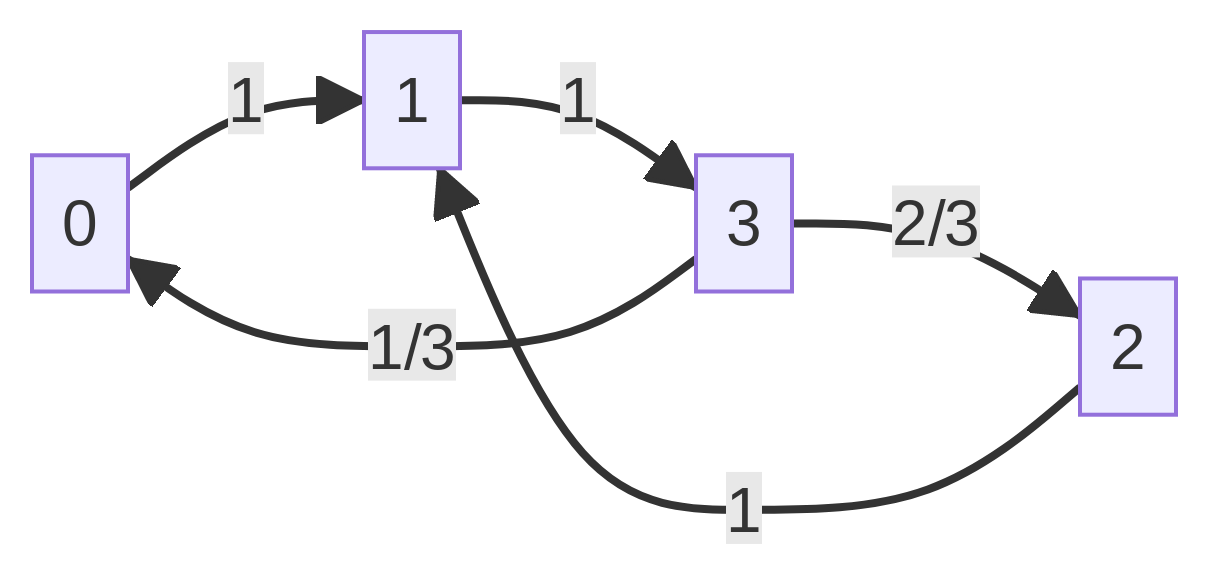

**0에서 시작한다면?**

-   $0 \to 1 \to 3 \to 0$
-   $0 \to 1 \to 3 \to 2 \to 1 \to 3 \to 0$
-   $0 \to 1 \to 3 \to 2 \to 1 \to 3 \to 2 \to \cdots$

> 3번만에 되돌아오거나, 6번만에 되돌아오거나, 9번만에 되돌아오거나 …
> $\Rightarrow$ 주기는 3 (3,6,9의 최대공약수는 3)

**1에서 시작한다면?**

-   $1 \to 3 \to 0 \to 1$
-   $1 \to 3 \to 2 \to 1 \to 3 \to 0 \to 1$
-   $\dots$

**2에서 시작한다면?**

**3에서 시작한다면?**

> 꿀팁: HMC $\{X_t\}$가 irreducible 이라면 모든 $x \in E$ 는 같은 주기를
> 가진다.